In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from correlation_ansatzs import get_torus_correlation_ansatz,loglog

fitted parameters: [0.16695077]
$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus


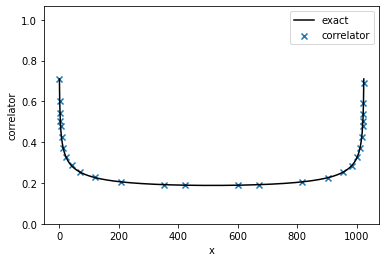

In [8]:
data01=pd.read_pickle('data/hotrg_X24_torus_correlation_y_10.pkl')
data01['x']=data01['x1']-data01['x0']
data1=data01[data01['y0']==0]


lattice_size=(1024,1024)
ansatz=get_torus_correlation_ansatz(lattice_size)
try:
    p,cov=curve_fit(ansatz,data1['x'],data1['correlation'],p0=ansatz.p0,maxfev=10000)
except Exception as err:
    print('error',err)
    p,cov=None,None
print('fitted parameters:',p)
ls=np.linspace(1,1023,1023)
plt.plot(ls,ansatz(ls,*p),'-',label='exact',color='black')


plt.scatter(data1['x'],data1['correlation'],marker='x',color='C0',label='correlator')

plt.xlabel('x')
plt.ylabel('correlator')
plt.ylim([0,data1['correlation'].max()*1.5])
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim([1e-2,1])
plt.legend()
print(r'$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus')
plt.show()

fitted parameters: [0.00518486]
$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus


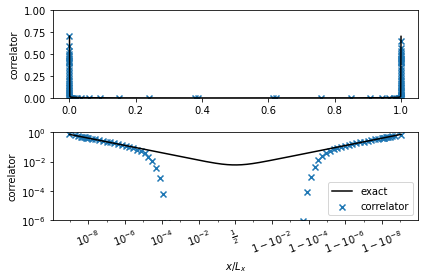

In [15]:

data1=pd.read_pickle('data/hotrg_X24_torus_correlation_30_00.pkl')


lattice_size=(2**30,2**30)

ansatz=get_torus_correlation_ansatz(lattice_size)

data_slice=data1[data1['correlation']>.1]
logX,logY=np.log(data1['x']),np.log(data1['correlation'])

p,cov=curve_fit(ansatz,data1['x'],data1['correlation'],p0=ansatz.p0,maxfev=10000)
# p,cov=curve_fit(loglog(ansatz),data1['x'],data1['correlation'],p0=ansatz.p0,maxfev=10000)
print('fitted parameters:',p)


ls=np.linspace(1,2**30-1,1024)


# plt.scatter(data1['x'],data1['correlation'],marker='x',color='black',label='correlation')


print(r'$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus')

axes=plt.subplot_mosaic('aa\nbb')[1]
plt.sca(axes['a'])
plt.plot(ls/2**30,ansatz(ls,*p),'-',color='black',label='exact')
plt.scatter(data1['x']/2**30,data1['correlation'],marker='x',color='C0',label='correlator')
#plt.xlabel(r'$x/L_x$')
plt.ylabel('correlator')
plt.ylim([0,1])
#plt.legend()

plt.sca(axes['b'])
plt.plot(ls/2**30,ansatz(ls,*p),'-',color='black',label='exact')
plt.scatter(data1['x']/2**30,data1['correlation'],marker='x',color='C0',label='correlator')
plt.xlabel(r'$x/L_x$')
plt.ylabel('correlator')
plt.ylim([1e-6,1])
plt.yscale('log')
plt.xscale('logit')
# rotate the x ticks
plt.xticks(rotation=20)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

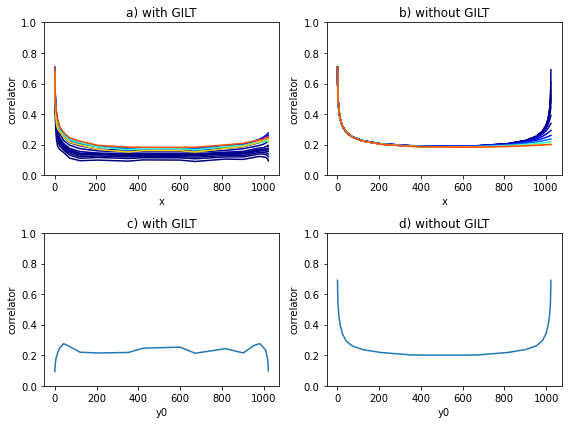

In [74]:
plt.figure(figsize=(8,6))
cmap=plt.get_cmap('jet')

plt.subplot(222)

data=pd.read_pickle('data/hotrg_X24_torus_correlation_y_10.pkl')
data['x']=data['x1']-data['x0']
for y0 in sorted(set(data['y0'])):
    if y0<512:
        data_sel=data[data['y0']==y0]
        plt.plot(data_sel['x'],data_sel['correlation'],'-',color=cmap(y0/512))
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=0,vmax=512))
# sm.set_array([])
# plt.colorbar(sm)

plt.title('b) without GILT')
plt.xlabel('x')
plt.ylabel('correlator')
plt.ylim([0,1])

plt.subplot(224)

data_sel=data[data['x1']==1023]
plt.plot(data_sel['y0'],data_sel['correlation'],'-')
plt.title('d) without GILT')
plt.xlabel('y0')
plt.ylabel('correlator')
plt.ylim([0,1])

ax=plt.subplot(221)

data=pd.read_pickle('data/hotrg_gilt_X24_torus_correlation_y_10.pkl')
data['x']=data['x1']-data['x0']

cmap=plt.get_cmap('jet')
for y0 in sorted(set(data['y0'])):
    if y0<512:
        data_sel=data[data['y0']==y0]
        plt.plot(data_sel['x'],data_sel['correlation'],'-',color=cmap(y0/512),label='y_0={}'.format(y0))
plt.title('a) with GILT')
plt.xlabel('x')
plt.ylabel('correlator')
plt.ylim([0,1])

plt.subplot(223)

data_sel=data[data['x1']==1023]
plt.plot(data_sel['y0'],data_sel['correlation'],'-')
plt.title('c) with GILT')
plt.xlabel('y0')
plt.ylabel('correlator')
plt.ylim([0,1])


plt.tight_layout()
plt.show()



<phi(x0,y0)phi(x0+x,y0)>
fitted parameters: [0.16695077]


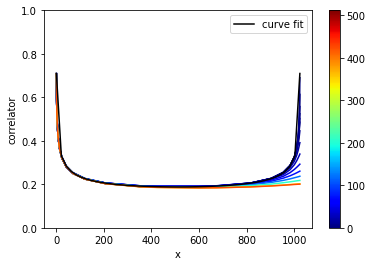

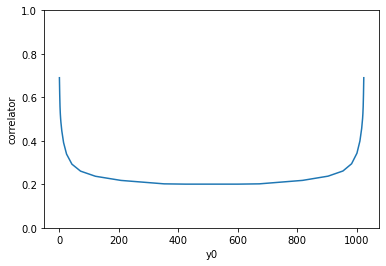

In [62]:
data=pd.read_pickle('data/hotrg_X24_torus_correlation_y_10.pkl')
data['x']=data['x1']-data['x0']

print('<phi(x0,y0)phi(x0+x,y0)>')
cmap=plt.get_cmap('jet')
for y0 in sorted(set(data['y0'])):
    if y0<512:
        data_sel=data[data['y0']==y0]
        plt.plot(data_sel['x'],data_sel['correlation'],'-',color=cmap(y0/512))
# draw a colorbar 0-512
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=0,vmax=512))
sm.set_array([])
plt.colorbar(sm)

lattice_size=(1024,1024)
ansatz=get_torus_correlation_ansatz(lattice_size)
try:
    data_sel=data[data['y0']==0]
    p,cov=curve_fit(ansatz,data_sel['x'],data_sel['correlation'],p0=ansatz.p0,maxfev=10000)
except Exception as err:
    print('error',err)
    p,cov=None,None
print('fitted parameters:',p)
ls=np.linspace(1,1023)
plt.plot(ls,ansatz(ls,*p),'-',color='black',label='curve fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('correlator')
plt.ylim([0,1])

plt.show()

data_sel=data[data['x1']==1023]
plt.plot(data_sel['y0'],data_sel['correlation'],'-')
plt.xlabel('y0')
plt.ylabel('correlator')
plt.ylim([0,1])
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<phi(x0,y0)phi(x0+x,y0)>


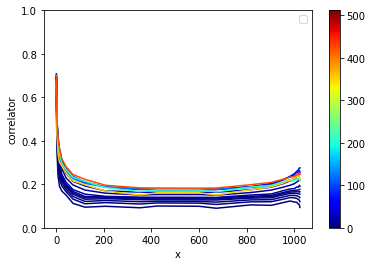

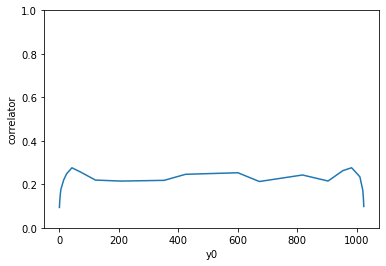

In [45]:
data=pd.read_pickle('data/hotrg_gilt_X24_torus_correlation_y_10.pkl')
data['x']=data['x1']-data['x0']

print('<phi(x0,y0)phi(x0+x,y0)>')
cmap=plt.get_cmap('jet')
for y0 in sorted(set(data['y0'])):
    if y0<512:
        data_sel=data[data['y0']==y0]
        plt.plot(data_sel['x'],data_sel['correlation'],'-',color=cmap(y0/512))
# draw a colorbar 0-512
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=0,vmax=512))
sm.set_array([])
plt.colorbar(sm)

# lattice_size=(1024,1024)
# ansatz=get_torus_correlation_ansatz(lattice_size)
# try:
#     data_sel=data[data['y0']==0]
#     p,cov=curve_fit(ansatz,data_sel['x'],data_sel['correlation'],p0=ansatz.p0,maxfev=10000)
# except Exception as err:
#     print('error',err)
#     p,cov=None,None
# print('fitted parameters:',p)
# ls=np.linspace(1,1023)
# plt.plot(ls,ansatz(ls,*p),'-',color='black',label='curve fit')


plt.legend()
plt.xlabel('x')
plt.ylabel('correlator')
plt.ylim([0,1])

plt.show()

data_sel=data[data['x1']==1023]
plt.plot(data_sel['y0'],data_sel['correlation'],'-')
plt.xlabel('y0')
plt.ylabel('correlator')
plt.ylim([0,1])
plt.show()


<phi(x0,y0)phi(x0+x,y0)>


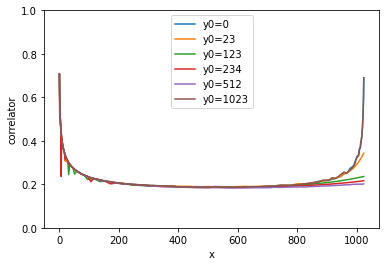

In [10]:
def process_data(data):
    data['x']=data['x1']-data['x0']
    data=data.sort_values(by='x')
    return data
data1=process_data(pd.read_pickle('data/hotrg_X24_torus_correlation_S1024_Y0.pkl'))
data6=process_data(pd.read_pickle('data/hotrg_X24_torus_correlation_S1024_Y23.pkl'))
data2=process_data(pd.read_pickle('data/hotrg_X24_torus_correlation_S1024_Y123.pkl'))
data3=process_data(pd.read_pickle('data/hotrg_X24_torus_correlation_S1024_Y234.pkl'))
data4=process_data(pd.read_pickle('data/hotrg_X24_torus_correlation_S1024_Y512.pkl'))
data5=process_data(pd.read_pickle('data/hotrg_X24_torus_correlation_S1024_Y1023.pkl'))

print('<phi(x0,y0)phi(x0+x,y0)>')
plt.plot(data1['x'],data1['correlation'],'-',label='y0=0')
plt.plot(data6['x'],data6['correlation'],'-',label='y0=23')
plt.plot(data2['x'],data2['correlation'],'-',label='y0=123')
plt.plot(data3['x'],data3['correlation'],'-',label='y0=234')
plt.plot(data4['x'],data4['correlation'],'-',label='y0=512')
plt.plot(data5['x'],data5['correlation'],'-',label='y0=1023')
plt.xlabel('x')
plt.ylabel('correlator')
plt.ylim([0,1])
plt.legend()
plt.show()

<phi(0,y)phi(1023,y)>


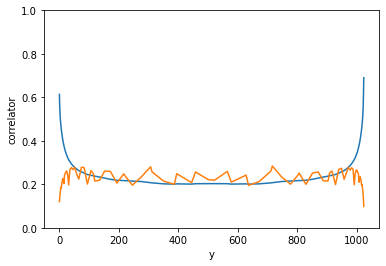

In [30]:
def process_data(data):
    return data.sort_values(by='y0')
data1=process_data(pd.read_pickle('data/hotrg_X24_torus_correlation_Y_S1024.pkl'))
data2=process_data(pd.read_pickle('data/hotrg_gilt_X24_torus_correlation_Y_S1024.pkl'))

print('<phi(0,y)phi(1023,y)>')
plt.plot(data1['y0'],data1['correlation'],'-',label='without gilt')
plt.plot(data2['y0'],data2['correlation'],'-',label='with gilt')
plt.xlabel('y')
plt.ylabel('correlator')
plt.ylim([0,1])
plt.show()

fitted parameters: [0.16695077]
$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus


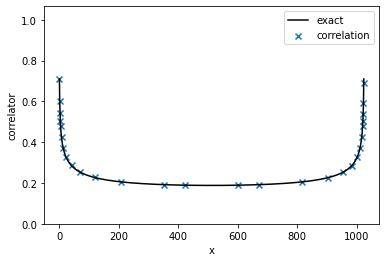

In [86]:
data01=pd.read_pickle('data/hotrg_X24_torus_correlation_y_10.pkl')
data01['x']=data01['x1']-data01['x0']
data1=data01[data01['y0']==0]


lattice_size=(1024,1024)
ansatz=get_torus_correlation_ansatz(lattice_size)
try:
    p,cov=curve_fit(ansatz,data1['x'],data1['correlation'],p0=ansatz.p0,maxfev=10000)
except Exception as err:
    print('error',err)
    p,cov=None,None
print('fitted parameters:',p)
ls=np.linspace(1,1023,1023)
plt.plot(ls,ansatz(ls,*p),'-',label='exact',color='black')


plt.scatter(data1['x'],data1['correlation'],marker='x',color='C0',label='correlation')

plt.xlabel('x')
plt.ylabel('correlator')
plt.ylim([0,data1['correlation'].max()*1.5])
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim([1e-2,1])
plt.legend()
print(r'$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus')
plt.show()

fitted parameters: [0.00518486]
$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus


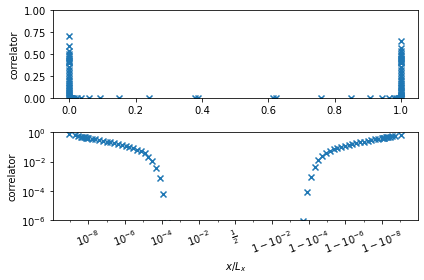

In [113]:

data1=pd.read_pickle('data/hotrg_X24_torus_correlation_30_00.pkl')
lattice_size=(2**30,2**30)

ansatz=get_torus_correlation_ansatz(lattice_size)
try:
    p,cov=curve_fit(ansatz,data1['x'],data1['correlation'],p0=ansatz.p0,maxfev=10000)
except Exception as err:
    print('error',err)
    p,cov=None,None
print('fitted parameters:',p)


#ls=np.linspace(1,1023)
#plt.plot(ls,ansatz(ls,*p),'-',label='curve fit')


# plt.scatter(data1['x'],data1['correlation'],marker='x',color='black',label='correlation')


print(r'$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus')

axes=plt.subplot_mosaic('aa\nbb')[1]
plt.sca(axes['a'])
plt.scatter(data1['x']/2**30,data1['correlation'],marker='x',color='C0',label='correlation')
#plt.xlabel(r'$x/L_x$')
plt.ylabel('correlator')
plt.ylim([0,1])
#plt.legend()

plt.sca(axes['b'])
plt.scatter(data1['x']/2**30,data1['correlation'],marker='x',color='C0',label='correlation')
plt.xlabel(r'$x/L_x$')
plt.ylabel('correlator')
plt.ylim([1e-6,1])
plt.yscale('log')
plt.xscale('logit')
# rotate the x ticks
plt.xticks(rotation=20)
#plt.legend()

plt.tight_layout()
plt.show()

In [97]:
axes

(<Figure size 432x288 with 3 Axes>,
 {'a': <AxesSubplot:label='a'>,
  'b': <AxesSubplot:label='b'>,
  'c': <AxesSubplot:label='c'>})

fitted parameters: [0.16695077]
$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus


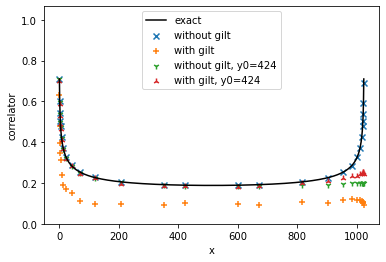

In [20]:
# data1=pd.read_pickle('data/hotrg_X24_torus_correlation_1024_00.pkl')
# data2=pd.read_pickle('data/hotrg_gilt_X24_torus_correlation_1024_00.pkl')

data01=pd.read_pickle('data/hotrg_X24_torus_correlation_y_10.pkl')
data02=pd.read_pickle('data/hotrg_gilt_X24_torus_correlation_y_10.pkl')
data01['x']=data01['x1']-data01['x0']
data02['x']=data02['x1']-data02['x0']
data1=data01[data01['y0']==0]
data2=data02[data02['y0']==0]
data3=data01[data01['y0']==424]
data4=data02[data02['y0']==424]


lattice_size=(1024,1024)
ansatz=get_torus_correlation_ansatz(lattice_size)
try:
    p,cov=curve_fit(ansatz,data1['x'],data1['correlation'],p0=ansatz.p0,maxfev=10000)
except Exception as err:
    print('error',err)
    p,cov=None,None
print('fitted parameters:',p)
ls=np.linspace(1,1023,1023)
plt.plot(ls,ansatz(ls,*p),'-',label='exact',color='black')


# plt.scatter(data1['x'],data1['correlation'],marker='x',color='black',label='correlation')

plt.scatter(data1['x'],data1['correlation'],marker='x',color='C0',label='without gilt')
plt.scatter(data2['x'],data2['correlation'],marker='+',color='C1',label='with gilt')
plt.scatter(data3['x'],data3['correlation'],marker='1',color='C2',label='without gilt, y0=424')
plt.scatter(data4['x'],data4['correlation'],marker='2',color='C3',label='with gilt, y0=424')

plt.xlabel('x')
plt.ylabel('correlator')
plt.ylim([0,data1['correlation'].max()*1.5])
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim([1e-2,1])
plt.legend()
print(r'$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus')
plt.show()

fitted parameters: [0.11985585]
$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus


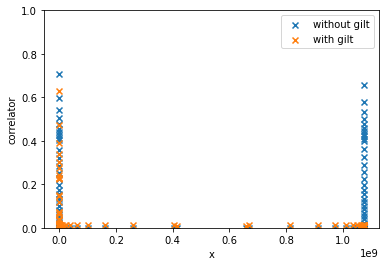

In [90]:

data1=pd.read_pickle('data/hotrg_X24_torus_correlation_30_00.pkl')
data2=pd.read_pickle('data/hotrg_gilt_X24_torus_correlation_30_00.pkl')
lattice_size=(1024,1024)

ansatz=get_torus_correlation_ansatz(lattice_size)
try:
    p,cov=curve_fit(ansatz,data1['x'],data1['correlation'],p0=ansatz.p0,maxfev=10000)
except Exception as err:
    print('error',err)
    p,cov=None,None
print('fitted parameters:',p)


#ls=np.linspace(1,1023)
#plt.plot(ls,ansatz(ls,*p),'-',label='curve fit')


# plt.scatter(data1['x'],data1['correlation'],marker='x',color='black',label='correlation')

plt.scatter(data1['x'],data1['correlation'],marker='x',color='C0',label='without gilt')
plt.scatter(data2['x'],data2['correlation'],marker='x',color='C1',label='with gilt')

plt.xlabel('x')
plt.ylabel('correlator')
plt.ylim([0,1])
plt.legend()
print(r'$\langle\sigma(0,0)\sigma(x,0)\rangle$ on a torus')
plt.show()